Business Oriented Descriptive Statistics
===

Foreword:
---

To be written :3

Imports:
---

Below are the basic imports which we are going to use, please make note that in order for the charts to show up in the notebook we need to type the following line at the very beginning **"%matplotlib inline"**

In [34]:
%matplotlib inline
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from io import StringIO
from time import time
from datetime import date

Load Data:
---

We will use the **requests** library to fetch the data from Yahoo Fiance. The only thing we need is the URL which gets us the data we require, in this case the daily historical data for GE for the period between 01/04/2016 and 06/22/2016. Once we have the raw data we can get its text property and pass it to the **StringIO** method and fake the behavior of an actual csv file which is required by the **read_csv method** from the pandas library.

In [2]:
ex1_raw_data = requests.get('http://chart.finance.yahoo.com/table.csv?s=GE&a=0&b=4&c=2016&d=6&e=22&f=2016&g=d&ignore=.csv')
ex1_data = pd.read_csv(StringIO(ex1_raw_data.text),
                      sep=',',
                      encoding='latin1',
                      parse_dates=['Date'],
                      dayfirst=True,
                      index_col='Date').sort_index()

# Measurements of Central Tendency

The **measures of central tendency** are statistical measurements that allow us to summarize in a single value the central value for a given dataset.

## Average:


The **average** or **sample mean** (when the data comes from a sample) is the summation of the array's values divided by the number of observations (the size of the sample **n**)

$$\bar{X} = \frac{\sum_{i=1}^n X_i}n$$

First we have to get the value for **n**. We will use the built in function **len()** in comination with the DataFrame's index attribute passed as a parameter. For the sum of the values we will use the built-in **sum()** method or we could go all-out fancy mode and use a lambda function passed as a parameter to the reduce function which we **need to import from the functools package**.

Thankfully Numpy comes with an implementation of the **mean** function which can also work with multidimensional arrays (matrices)

In [3]:
start = time()

avg = np.mean(ex1_data['Adj Close'])

total = time() - start

print('Mean with Numpy:', avg, 'in', total, 'seconds.')

Mean with Numpy: 29.2846511357 in 0.0006670951843261719 seconds.


## Median:

If we sort our data in an ascending or descending order, the record which takes the center of the distribution is called the **median**. If our set contains an odd number of items we only have **one item that represents the median** and we can just pick it out from our list, however if our dataset has an even number of observations then we have to take the two items that split the set in an equal amount of items both left and righ, those numbers being $X_{n/2}$ and $X_{(n/2)+1}$ and **perform the mean with those 2 observations**.
We can use Numpy's *median* method to retrieve it.

In [4]:
start = time()
median = np.median(ex1_data['Adj Close'])
total = time() - start

print('Median with Numpy:', median, 'in', total, 'seconds')

Median with Numpy: 29.3093275 in 0.0005476474761962891 seconds


## Outliers:

If one of the elements in the data has an extremely high or low value it is called an **outlier** and will make the average and the median to grow considerably distand from each other. Let's try adding 100 random outliers with floating point values ranging from 1 to 10.

In [144]:
import random

aux_series = ex1_data['Adj Close']
print('Our collection is of type ', 
      type(aux_series), 
      '\nso we need to create an outlier of the same type with pd.Series() method\n')

outlier = pd.Series([random.uniform(1, 10)] * 100, index=[date.today()] * 100)
aux_series = aux_series.append(outlier)

aux_avg = np.mean(aux_series)
aux_mdn = np.median(aux_series)
print('\nOriginal Average:', avg, ', original Median:', median)
print('Mean w/outliers:', aux_avg, ', median wo/outliers:', aux_mdn)

Our collection is of type  <class 'pandas.core.series.Series'> 
so we need to create an outlier of the same type with pd.Series() method


Original Average: 29.2846511357 , original Median: 29.3093275
Mean w/outliers: 19.8901980594 , median wo/outliers: 27.551777


### A wizard once said...
> The **average** or **sample mean** is pretty sensitive to the presence of extreme values and that makes the **median** preferrable in that scenario.

## Mode

The **mode** is the most frequent value within a data set. It is relevant only in some situations because it could either:
- Not exist (there are no repeated observations)
- Is not placed at the center of the distribution (is not a measurement of **central tendency**)
- It's not unique

There is no direct support for finding the mode in Numpy, so we will make a tiny algorithm to get it from this dataset.

In [145]:
# The underscore discards the returned value
(_, idx, counts) = np.unique(ex1_data['Adj Close'], return_index=True, return_counts=True)
# If len(np.argmax(counts)) not == 1 then discard the mode
index = idx[np.argmax(counts)]
mode = ex1_data['Adj Close'][index]
print('In this case mode: {0}, sample mean: {1} and median: {2}'.format(mode.round(2), avg.round(2), median.round(2)))

In this case mode: 27.17, sample mean: 29.28 and median: 29.31


If we plot a **histogram** we can see that the mode is placed way off the center of the distribution. To discard the returned value as the mode of our data we can also check if is exists within the range of the **standard deviation** (more on this later)

The mode 27.17 as a valid one is False


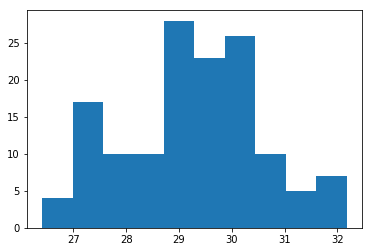

In [146]:
n, bins, patches = plt.hist(sorted_df)

stdev = np.std(sorted_df)
maxim = avg + stdev
minim = avg - stdev
print('The mode {0} as a valid one is {1}'.format(mode.round(2), minim <= mode <= maxim))

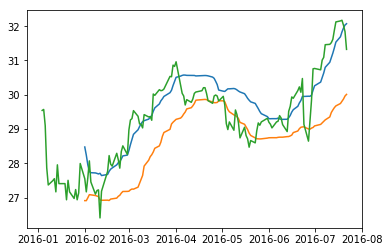

In [210]:
def bb_lo(x):
    return np.mean(x) - np.std(x)

def bb_hi(x):
    return np.mean(x) + np.std(x)

std = np.std(ex1_data['Adj Close'])
bb_lo = ex1_data['Adj Close'].rolling(window=20).apply(bb_lo)
bb_hi = ex1_data['Adj Close'].rolling(window=20).apply(bb_hi)
ex1_data['bb-'] = bb_lo
ex1_data['bb+'] = bb_hi
plt.plot(ex1_data[['bb+','bb-', 'Adj Close']])